In [1]:
import numpy as np
import bilby 
import pycbc 
import sys
import torch
import matplotlib.pyplot as plt
import glob

/home/qian.hu/.conda/envs/myigwn-py39/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [2]:
#sys.path.append('/Users/qianhu/Documents/Glasgow/research/river')
import river.data
from river.data.datagenerator import DataGeneratorBilbyFD
from river.data.dataset import DatasetStrainFD, DatasetXFromPreCalSVDData
#import river.data.utils as datautils
from river.data.utils import *

from river.models import embedding
from river.models import utils as modelutils

In [3]:
200000 / 1000 * 5 / 60

16.666666666666668

In [6]:
data_template_generator = DataGeneratorBilbyFD(source_type,
                detector_names, 
                duration, 
                f_low, 
                f_ref, 
                sampling_frequency, 
                waveform_approximant, 
                parameter_names,
                PSD_type=PSD_type,
                use_sealgw_detector=False,
                snr_threshold=8)

03:16 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


Using zero_noise PSDs to generate data.


In [7]:
Nsample = 2
injection_parameters_all = generate_BNS_injection_parameters(
        Nsample*2,
        a_max=0.1,
        d_min=10,
        d_max=50,
        d_power=1)

In [4]:
source_type = 'BNS'
detector_names = ['H1', 'L1', 'V1'] 
#detector_names = ['H1'] 
duration = 320
f_low = 20
f_ref = 20
sampling_frequency = 2048
waveform_approximant = 'IMRPhenomPv2_NRTidal'
parameter_names = PARAMETER_NAMES_ALL_PRECESSINGBNS_BILBY
PSD_type = 'zero_noise' #'zero_noise'



In [8]:
data_template_generator.generate_waveforms(injection_parameters_all)

In [19]:
strain_template_dict = data_template_generator.waveforms['waveform_polarizations']#['plus']['amplitude']

In [26]:
for modename in ['plus', 'cross']:
    h = np.array(strain_template_dict[modename]['amplitude']) * np.exp(1j* np.array(strain_template_dict[modename]['phase']))

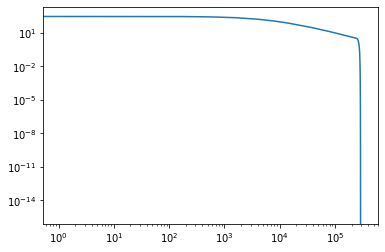

In [32]:
plt.loglog(abs(h[1]))

In [23]:
np.array(strain_template_dict[modename]['amplitude'])

array([[246.53290149, 246.48980036, 246.44680777, ...,   0.        ,
          0.        ,   0.        ],
       [318.78249425, 318.73049522, 318.6786962 , ...,   0.        ,
          0.        ,   0.        ],
       [218.56196349, 218.50079168, 218.43951575, ...,   1.82489653,
          1.82488888,   0.        ],
       [316.24749198, 316.18355976, 316.11943689, ...,   0.        ,
          0.        ,   0.        ]])

In [25]:
np.array(np.exp(1j* np.array(strain_template_dict[modename]['phase'])))

array([[ 0.64533672-7.63898235e-01j,  0.98933937+1.45628318e-01j,
         0.39823428+9.17283739e-01j, ...,  1.        +5.03162773e-11j,
         1.        +5.03162773e-11j,  1.        +5.03162773e-11j],
       [-0.82677506+5.62532666e-01j, -0.83795846-5.45734023e-01j,
         0.17970839-9.83719927e-01j, ...,  1.        +4.82366014e-11j,
         1.        +4.82366014e-11j,  1.        +4.82366014e-11j],
       [-0.71024719+7.03952367e-01j,  0.46338077-8.86159275e-01j,
        -0.17173321+9.85143494e-01j, ...,  0.90439164+4.26703360e-01j,
         0.90439229+4.26701986e-01j,  1.        +1.70614688e-10j],
       [-0.30185895+9.53352598e-01j, -0.98640092+1.64357034e-01j,
        -0.59503689-8.03698390e-01j, ...,  1.        +6.14301504e-11j,
         1.        +6.14301504e-11j,  1.        +6.14301504e-11j]])

In [17]:
data_template_generator.rearrange_waveforms_for_ipca(data_template_generator.waveforms['waveform_polarizations'])

TypeError: string indices must be integers

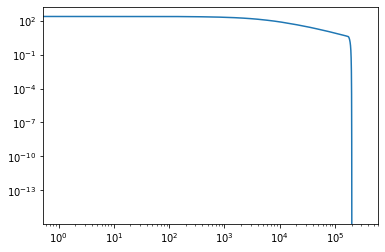

In [15]:
plt.loglog(data_template_generator.waveforms['waveform_polarizations']['plus']['amplitude'][0])

In [51]:
a = np.array([[1],[2],[3]])
b = np.expand_dims(a, 0)

In [52]:
a.shape

(3, 1)

In [65]:
ooo = np.ones((2000000, 9, 256))*1.1

In [58]:
ooo.shape

(2000000, 9, 256)

In [66]:
sys.getsizeof(ooo) / 1e9

36.864000144

In [67]:
del ooo

In [53]:
b.shape

(1, 3, 1)

In [48]:
torch.Tensor([1]).detach()a

tensor([1.])

In [6]:
ipca_gen = modelutils.load_model('/home/qian.hu/mlpe/river/scripts/ipca_models/hphc/IPCA_HPHC_BNSFD_10000to256_ExpUnwrap_lowspin_200Mpc.pickle')

Model loaded from /home/qian.hu/mlpe/river/scripts/ipca_models/hphc/IPCA_HPHC_BNSFD_10000to256_ExpUnwrap_lowspin_200Mpc.pickle


In [43]:
%time testfff = load_dict_from_hdf5('/home/qian.hu/mlpe/training_data/bns_320s_dataproj_lowspin_2d/valid/batch0/bns_320s_dataproj_lowspin_2d_0.h5')



CPU times: user 17.8 ms, sys: 12.2 ms, total: 29.9 ms
Wall time: 40.6 ms


In [17]:
data_generator = DataGeneratorBilbyFD(source_type,
            detector_names, 
            duration, 
            f_low, 
            f_ref, 
            sampling_frequency, 
            waveform_approximant, 
            parameter_names,
            PSD_type=PSD_type,
            use_sealgw_detector=True)

data_generator_svd = DataGeneratorBilbyFD(source_type,
            detector_names, 
            duration, 
            f_low, 
            f_ref, 
            sampling_frequency, 
            waveform_approximant, 
            parameter_names,
            PSD_type=PSD_type,
            use_sealgw_detector=True,
                                         ipca = ipca_gen.pca_dict)


05:02 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
05:02 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


Using zero_noise PSDs to generate data.
Using zero_noise PSDs to generate data.


In [18]:
def update_injection_parameters(injection_parameters):
    injection_parameters['ra'] = np.random.uniform(0, np.pi)
    injection_parameters['dec'] = np.arcsin(np.random.uniform(-1, 1))
    injection_parameters['psi'] = np.random.uniform(0, np.pi)
    injection_parameters['geocent_time'] = np.random.uniform(-0.1, 0.1)
    injection_parameters['luminosity_distance'] = generate_random_distance(Nsample=1, low=10, high=200, power=1)[0]

    return injection_parameters

In [19]:
wf_dict = data_generator_svd.get_one_waveform(0, testfff['waveform_polarizations'])
injection_parameters = data_generator_svd.get_one_injection_parameters(0,  testfff['injection_parameters'], is_intrinsic_only=True)
injection_parameters = update_injection_parameters(injection_parameters)


In [20]:
while not data_generator_svd.inject_one_signal_from_waveforms(injection_parameters, wf_dict):
    injection_parameters = update_injection_parameters(injection_parameters) 

In [33]:
data_dict = data_generator_svd.data
s = np.array(list(data_dict['strains'][detname] for detname in detector_names ))
psd = np.array(list(data_dict['PSDs'][detname] for detname in detector_names ))
inv_asd = np.float32(1 / (psd**0.5))
###s_whitened = np.complex64(s*inv_asd)
s_whitened = np.complex64(s*1e23)
inv_asd = torch.from_numpy(inv_asd*1e-23).movedim(0,1).float()[0]
strain = torch.from_numpy(s_whitened).movedim(0,1)[0] # is complex

In [37]:
data_generator_svd.detector_names

['H1', 'L1', 'V1']

In [8]:
data_generator.inject_signals(injection_parameters_all, Nsample*2, Nsample)

Injecting 0-th signal, 0.0% done
Injecting 1-th signal, 25.0% done


In [46]:
ds[0]

(tensor([ 3.0950e-01,  7.0817e-01,  1.4078e-02,  6.6037e-03,  1.0720e+00,
          1.2760e+00,  4.5948e+00,  8.0353e-01,  3.5210e+03, -3.7193e+02,
          1.3585e+00,  1.6137e+02,  1.6525e+00, -4.1056e-01,  2.8032e+00,
          1.2064e+00,  7.2084e-02]),
 tensor([[ 3.8566e+01, -2.8734e+00, -4.6818e-02,  ..., -1.1547e-01,
          -1.4920e-01,  2.6675e-01],
         [ 6.6355e+00, -4.9304e-01, -4.2133e-03,  ...,  1.1059e-01,
           1.5619e-01,  2.7113e-02],
         [ 2.0863e+01, -1.2316e+00,  1.9283e+00,  ...,  6.9269e-01,
           9.2063e-01, -3.4214e-02],
         ...,
         [ 8.9201e+02,  9.6728e+02, -7.3883e+01,  ...,  3.0520e-03,
          -3.6812e-03,  5.9541e-03],
         [ 8.9180e+02,  9.6627e+02, -8.8021e+01,  ...,  3.0563e-03,
           1.2149e-02,  3.3734e-03],
         [ 6.7317e+02,  3.4049e+02, -1.3444e+02,  ...,  3.4468e-03,
           7.1653e-03,  1.8849e-03]]))

In [39]:
filelist = glob.glob('/home/qian.hu/mlpe/training_data/bns_320s_dataproj_lowspin/train/batch*/*.h5')

In [40]:
len(filelist) * 200 # samples

4213800

In [41]:
len(filelist) * 1.8 / 1000 # GB

37.924200000000006

In [42]:
len(filelist) * 1.8 / 1000 / 512 * 100 # % on cit12

7.407070312500001

In [19]:
dsd = []
for ff in filelist:
    if len(dsd)<100:
        dsd.append(load_dict_from_hdf5(ff))

In [8]:
ds = DatasetXFromPreCalSVDData(dsd, PARAMETER_NAMES_CONTEXT_PRECESSINGBNS_BILBY)

In [13]:
ds[1][1].shape

torch.Size([9, 256])

In [17]:
len(dsd)

4824

In [16]:
1.8*5000/1000

9.0

In [38]:
def get_precalwf_list(folder, nbatch, file_per_batch, filename_prefix):
    file_list = []
    for ibatch in range(nbatch):
        for ifile in range(file_per_batch):
            filename = f"{folder}/batch{ibatch}/{filename_prefix}_{ifile}.h5"
            wf_dict = load_dict_from_hdf5(filename)
            file_list.append(wf_dict)
    return file_list

In [42]:
dsd = get_precalwf_list(folder='/home/qian.hu/mlpe/training_data/bns_320s_lowspin/valid',
                  nbatch=1,
                  file_per_batch=1,
                  filename_prefix='precalwf_bns_320s_lowspin')

In [43]:
dsd

1

In [9]:
data_generator_svd.generate_waveforms(injection_parameters_all)

In [10]:
h_recons = data_generator_svd.reconstruct_waveforms(data_generator_svd.waveforms['waveform_polarizations'][0], injection_parameters_all['luminosity_distance'][0])

(20.0, 23.0)

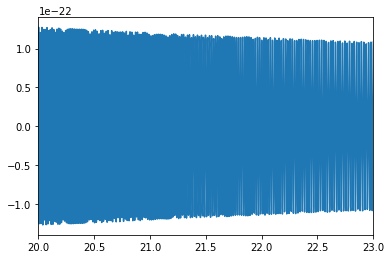

In [85]:
for i in range(1):

    injection_parameters = {}
    for paraname in PARAMETER_NAMES_ALL_PRECESSINGBNS_BILBY:
        injection_parameters[paraname] = injection_parameters_all[paraname][i]
    
    h_real = data_generator_svd.waveform_generator.frequency_domain_strain(injection_parameters)
    plt.plot(data_generator_svd.frequency_array_masked, (np.real(
                                               h_real['cross'][data_generator_svd.frequency_mask]
                                                                            )
                                                                 )
            )

plt.xlim(20, 23)

In [13]:
injection_parameters = {}
for paraname in PARAMETER_NAMES_ALL_PRECESSINGBNS_BILBY:
    injection_parameters[paraname] = injection_parameters_all[paraname][0]

h_real = data_generator_svd.waveform_generator.frequency_domain_strain(injection_parameters)

(20, 2048)

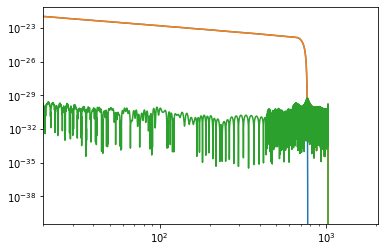

In [14]:
plt.loglog(data_generator_svd.frequency_array_masked, abs(h_real['plus'][data_generator_svd.frequency_mask]))
plt.loglog(data_generator_svd.frequency_array_masked, abs(h_recons['plus']))
plt.loglog(data_generator_svd.frequency_array_masked, abs(abs(h_recons['plus'])-abs(h_real['plus'][data_generator_svd.frequency_mask])))

plt.xlim(20,2048)

(20.0, 25.0)

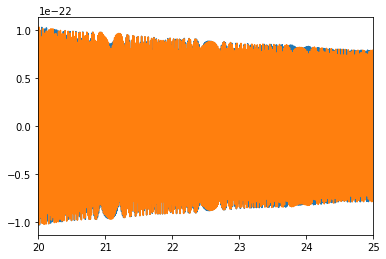

In [15]:
plt.plot(data_generator_svd.frequency_array_masked, np.real(h_real['plus'][data_generator_svd.frequency_mask]))
plt.plot(data_generator_svd.frequency_array_masked, np.real(h_recons['plus']))
#plt.loglog(data_generator_svd.frequency_array_masked, np.real(abs(h_recons['plus'])-abs(h_real['plus'][data_generator_svd.frequency_mask])))

plt.xlim(20,25)

(20.0, 1024.0)

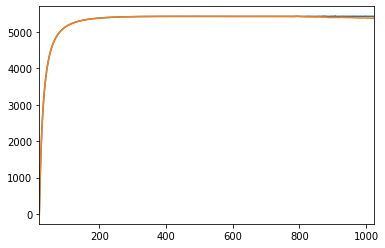

In [16]:
plt.plot(data_generator_svd.frequency_array_masked, np.unwrap(np.angle(h_real['plus'][data_generator_svd.frequency_mask])))
plt.plot(data_generator_svd.frequency_array_masked, np.unwrap(np.angle(h_recons['plus'])))
#plt.plot(data_generator_svd.frequency_array_masked, abs(abs(h_recons['plus'])-abs(h_real['plus'][data_generator_svd.frequency_mask])))

plt.xlim(20,1024)

In [24]:
data_generator_svd.inject_signals_from_waveforms(injection_parameters_all, Nsample*2, Nsample)

03:04 bilby WARNING : The injected signal has a duration in-band of 73.7s, but the data for detector H1 has a duration of 32s
03:04 bilby WARNING : The injected signal has a duration in-band of 125.5s, but the data for detector H1 has a duration of 32s


Injecting 0-th signal, 0.0% done
Injecting 1-th signal, 10.0% done
Injecting 2-th signal, 20.0% done


03:04 bilby WARNING : The injected signal has a duration in-band of 151.4s, but the data for detector H1 has a duration of 32s
03:04 bilby WARNING : The injected signal has a duration in-band of 78.2s, but the data for detector H1 has a duration of 32s
03:04 bilby WARNING : The injected signal has a duration in-band of 73.7s, but the data for detector H1 has a duration of 32s


Injecting 3-th signal, 30.0% done
Injecting 4-th signal, 40.0% done


In [25]:
h1 = data_generator.data['strains']['H1'][1]

In [26]:
h2 = data_generator_svd.data['strains']['H1'][1]

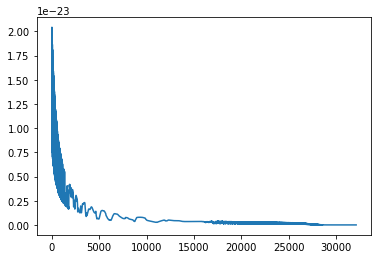

In [27]:
plt.plot(abs(h2))

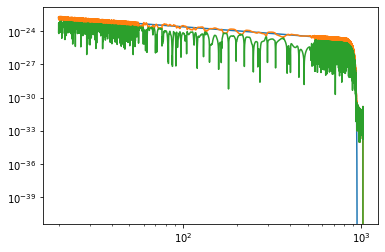

In [28]:
plt.loglog(data_generator.frequency_array_masked, abs(h1))
plt.loglog(data_generator_svd.frequency_array_masked, abs(h2), linestyle='-')
plt.loglog(data_generator_svd.frequency_array_masked, abs(abs(h1)-abs(h2)), linestyle='-')

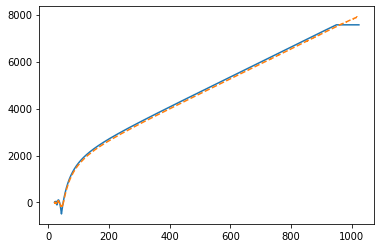

In [29]:
plt.plot(data_generator.frequency_array_masked, np.unwrap(np.angle(h1)))
plt.plot(data_generator_svd.frequency_array_masked, np.unwrap(np.angle(h2)), linestyle='--')

In [27]:
data_generator_svd.waveforms['waveform_polarizations'][0]['plus']['phase'].shape

(256,)

In [28]:
h1 = data_generator_test.reconstruct_waveforms(data_generator_test.waveforms['waveform_polarizations'][0], 
                                          dL = injection_parameters_all['luminosity_distance'][0])

In [29]:
h2 = data_generator_svd.reconstruct_waveforms(data_generator_svd.waveforms['waveform_polarizations'][0], 
                                          dL = injection_parameters_all['luminosity_distance'][0])

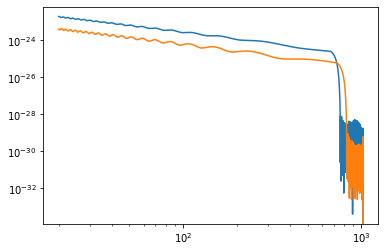

In [32]:
mode = 'cross'

plt.loglog(data_generator_test.frequency_array_masked, abs(h1[mode]))
plt.loglog(data_generator_test.frequency_array_masked, abs(h2[mode]))

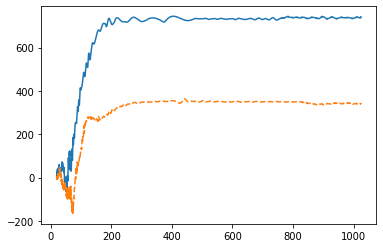

In [34]:
plt.plot(data_generator_test.frequency_array_masked, np.unwrap(np.angle(h1[mode])))
plt.plot(data_generator_test.frequency_array_masked, np.unwrap(np.angle(h2[mode])), linestyle='--')

In [3]:
data_generator.save_data('test1.h5')

NameError: name 'data_generator' is not defined

In [13]:
data_dict = load_dict_from_hdf5('test1.h5')

In [14]:
s = np.array(list(data_dict['strains'].values()))
psd = np.array(list(data_dict['PSDs'].values()))
inv_asd = np.float32(1/psd**0.5)
s_whitened = np.complex64(s*inv_asd)


In [15]:
inv_asd_t = torch.from_numpy(inv_asd*1e-23).movedim(0,1).float()
strain_t = torch.from_numpy(s_whitened).movedim(0,1) # is complex

In [7]:
#ds = DatasetStrainFD(data_dict=data_dict, parameter_names=PARAMETER_NAMES_PRECESSINGBNS_BILBY)
ds = DatasetStrainFD(data_dict=data_generator.data, parameter_names=PARAMETER_NAMES_PRECESSINGBNS_BILBY)

In [8]:
ds.strain.shape

torch.Size([10, 3, 32129])

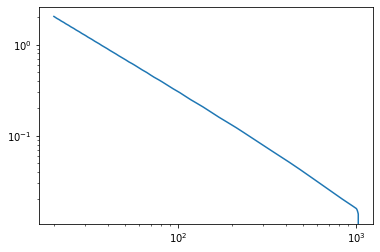

In [20]:
plt.loglog(ds.farray, abs(ds[0][1][0]) / inv_asd_t[0][1] )